In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)

In [2]:
df = pd.read_csv("urldata.csv")

In [3]:
df_sampled = df.sample(n=5000, random_state=42)

In [4]:
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(df_sampled['url'])
y = df_sampled['result']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Linear SVM": CalibratedClassifierCV(LinearSVC()),
    "Naive Bayes": GaussianNB()
}

In [12]:
results = []

In [9]:
for name, clf in classifiers.items():
    if name == "Naive Bayes":
        clf.fit(X_train.toarray(), y_train)
        y_pred = clf.predict(X_test.toarray())
        y_proba = clf.predict_proba(X_test.toarray())[:, 1]
    else:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_proba = clf.predict_proba(X_test)[:, 1]

In [10]:
results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba)
    })


In [11]:
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="F1 Score", ascending=False).reset_index(drop=True))

         Model  Accuracy  Precision   Recall  F1 Score   ROC AUC
0  Naive Bayes     0.722   0.449597  0.97807  0.616022  0.812222


Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



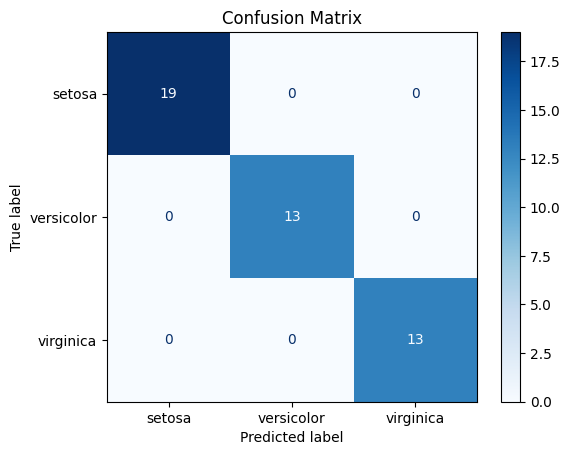

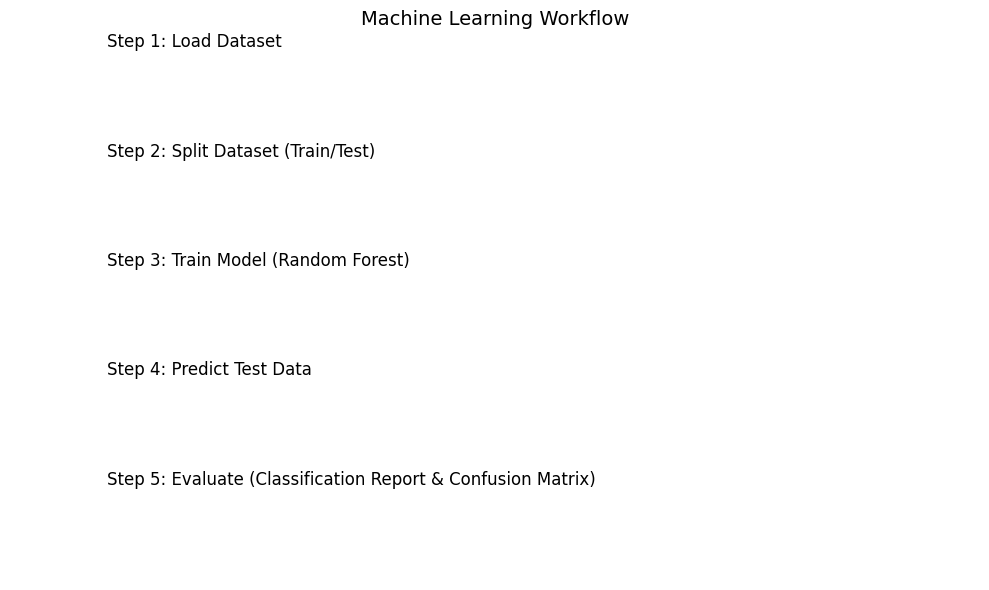

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Load dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# Display confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=iris.target_names, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Plot the ML workflow
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')
workflow = [
    "Step 1: Load Dataset",
    "Step 2: Split Dataset (Train/Test)",
    "Step 3: Train Model (Random Forest)",
    "Step 4: Predict Test Data",
    "Step 5: Evaluate (Classification Report & Confusion Matrix)"
]
for i, step in enumerate(workflow):
    ax.text(0.1, 1 - i*0.2, step, fontsize=12, va='top')

plt.title("Machine Learning Workflow", fontsize=14)
plt.tight_layout()
plt.show()
